In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
circular_database = pd.read_csv('./data/processed/circular_database.csv', index_col='Unnamed: 0')
circular_database['avg_temperature'] = circular_database[['max_temperature','min_temperature']].mean(axis=1)
circular_database['delta_temperature'] = circular_database['max_temperature'] - circular_database['min_temperature']
circular_database.drop(columns=['max_temperature','min_temperature'], inplace=True)
circular_database.sample(5)

,week,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,...,month_8,month_9,month_10,month_11,month_12,precipitation,8012,8022,avg_temperature,delta_temperature
2017-02-19,7,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0.0,489.0,391.0,28.20,12.8
2015-09-12,37,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,27.6,1154.0,1094.0,14.20,2.8
2019-04-03,14,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.0,3612.0,3370.0,23.75,12.1
2016-12-08,49,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0.0,4184.0,3503.0,25.35,12.5
2014-08-22,34,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0.0,4386.0,3489.0,21.65,14.7


In [3]:
X = circular_database.drop(columns=['8012','8022','precipitation','avg_temperature','delta_temperature','week'])
# ,'precipitation','avg_temperature','delta_temperature','week'
y = circular_database[['8012','8022']].sum(axis=1)
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
rfr = RandomForestRegressor(n_estimators=1000)

rfr.fit(X_train,y_train)

rfr_prediction = rfr.predict(X_test)
rfr_prediction;
print("Mean squared error:\t%.2f" % mean_squared_error(y_test, rfr_prediction))
print("RMS:\t%.2f" % np.sqrt(mean_squared_error(y_test, rfr_prediction)))
print('Variance score:\t%.2f' % r2_score(y_test, rfr_prediction))
rfr_prediction = rfr.predict(X_train)
print('RMS treino:\t%.2f' % np.sqrt(mean_squared_error(y_train, rfr_prediction)))
circular_database.keys()

Mean squared error:	3021456.29
RMS:	1738.23
Variance score:	0.68
RMS treino:	1666.94


Index(['week', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'precipitation', '8012', '8022',
       'avg_temperature', 'delta_temperature'],
      dtype='object')

Features sorted by their score:
[(0.45, 'weekday_6'), (0.35, 'weekday_5'), (0.06, 'month_1'), (0.04, 'month_12'), (0.03, 'month_7'), (0.01, 'weekday_4'), (0.01, 'weekday_3'), (0.01, 'weekday_1'), (0.01, 'weekday_0'), (0.01, 'month_4'), (0.01, 'month_2'), (0.0, 'weekday_2'), (0.0, 'month_9'), (0.0, 'month_8'), (0.0, 'month_6'), (0.0, 'month_5'), (0.0, 'month_3'), (0.0, 'month_11'), (0.0, 'month_10')]


C:\Users\Hclev\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


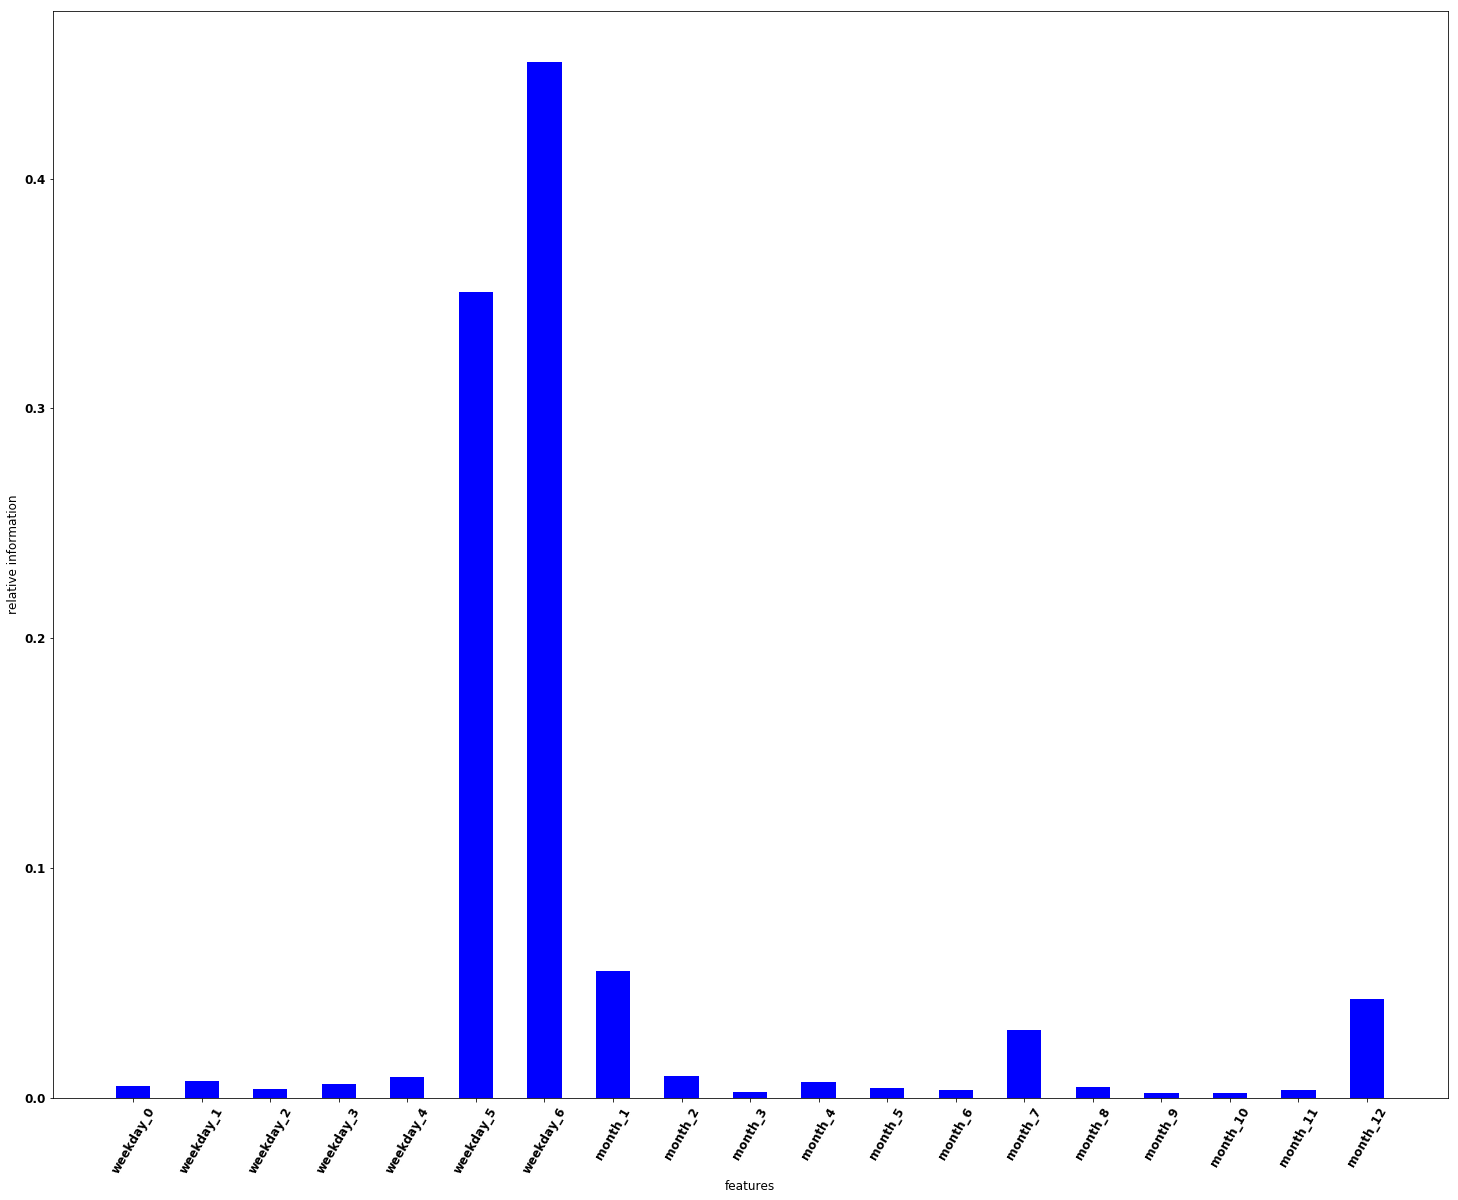

In [5]:
### single feature information evaluation
n_trees = 1000
features = circular_database.keys()
features_string=[]
for d in features:
    features_string.append(str(d))

features_string.remove('8022')
features_string.remove('8012')
features_string.remove('precipitation')
features_string.remove('avg_temperature')
features_string.remove('delta_temperature')
features_string.remove('week')
features=features_string
rf = RandomForestRegressor(n_trees)
rf.fit(X_train, y_train)
plt_x = np.linspace(0,len(features)-1,len(features))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), rf.feature_importances_), features),
             reverse=True))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.figure(figsize=(25,20))

plt.bar(plt_x, rf.feature_importances_, width=0.5, color="blue",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, features)
plt.ylabel("relative information")
plt.xlabel("features")
plt.show()